# Process to completing model

1. Load data and clean
2. Explore Data 
3. Analyze and Visualize Data
4. Build model

## Imports

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

In [3]:
data = pd.read_csv('Data/UCI_Credit_Card.csv')

In [4]:
display(data.head())

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
print(data.columns)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')


### What each variable means

In [ ]:
# Putting what each variable means for reference client
#LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
#SEX: Gender (1=male, 2=female)
#EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
#MARRIAGE: Marital status (1=married, 2=single, 3=others)
#AGE: Age in years
#PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment #delay for eight months, 9=payment delay for nine months and above)
#PAY_2: Repayment status in August, 2005 (scale same as above)
#PAY_3: Repayment status in July, 2005 (scale same as above)
#PAY_4: Repayment status in June, 2005 (scale same as above)
#PAY_5: Repayment status in May, 2005 (scale same as above)
#PAY_6: Repayment status in April, 2005 (scale same as above)
#BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
#BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
#BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
#BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
#BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
#BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
#PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
#PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
#PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
#PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
#PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
#PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
#default.payment.next.month: Default payment (1=yes, 0=no)

## Diagnosing/Treating Data

In [7]:
# Checking for missing data
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

None

In [11]:
# I noticed that September 2005 in PAY is labeled as 0, whereas other categories label september as 1
#default.payment.next.month too long so changing too
data =data.rename(columns = {'PAY_0':'PAY_1'})
data =data.rename(columns = {'default.payment.next.month':'default'})


In [8]:
# Okay so this is weird because 0 and -2 were not assigned labels to the data
# If the scale were according to months, my intuition is to assign anything under 0 to 0, representing paid on time
display(data[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe())

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [45]:
#assignment all -2 and -1 equal to 0, representing payment was on time
data['PAY_1'] = data['PAY_1'].replace(-1, 0).replace(-2, 0)
data['PAY_2'] = data['PAY_2'].replace(-1, 0).replace(-2, 0)
data['PAY_3'] = data['PAY_3'].replace(-1, 0).replace(-2, 0)
data['PAY_4'] = data['PAY_4'].replace(-1, 0).replace(-2, 0)
data['PAY_5'] = data['PAY_5'].replace(-1, 0).replace(-2, 0)
data['PAY_6'] = data['PAY_6'].replace(-1, 0).replace(-2, 0)

In [10]:
#checking to make sure everything has been cleaned up
display(data[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe())

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000
mean,0.356767,0.320033,0.304067,0.258767,0.22150,0.226567
std,0.760594,0.801727,0.790589,0.761113,0.71772,0.715438
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000


In [12]:
#checking the BILL_AMT columns
display(data[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe())

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [13]:
# checking the first couple of columns
# all the variables match with description
display(data[['SEX', 'EDUCATION', 'MARRIAGE', 'AGE']].describe())

,SEX,EDUCATION,MARRIAGE,AGE
count,30000.000000,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867,35.485500
std,0.489129,0.790349,0.521970,9.217904
min,1.000000,0.000000,0.000000,21.000000
25%,1.000000,1.000000,1.000000,28.000000
50%,2.000000,2.000000,2.000000,34.000000
75%,2.000000,2.000000,2.000000,41.000000
max,2.000000,6.000000,3.000000,79.000000


In [68]:
# because 5 and 6 for EDUCATION both represent 'unknown', I will combine
data['EDUCATION'] = data['EDUCATION'].replace(6, 5)

In [15]:
#checking the PAY_AMT columns
#these all look fine
display(data[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe())

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


## Visualization

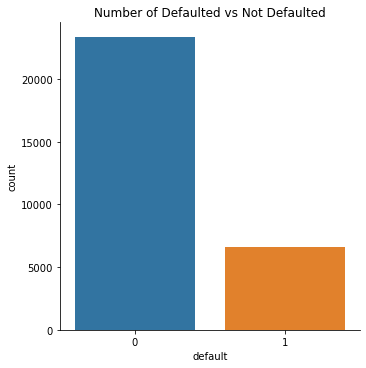

In [16]:
# looking at default stats
sns.catplot(x = 'default', data = data, kind = 'count')
plt.title("Number of Defaulted vs Not Defaulted")

plt.show()

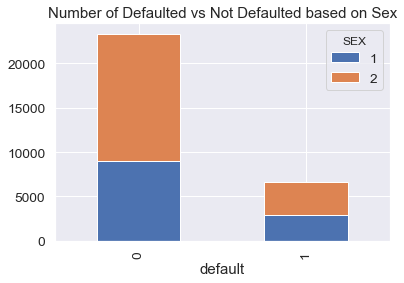

In [46]:
data_plot = data.groupby(['SEX', 'default']).size().reset_index().pivot(columns = 'SEX', index = 'default', values =0)
data_plot.plot(kind = 'bar', stacked=True)
plt.title("Number of Defaulted vs Not Defaulted based on Sex")
plt.show()

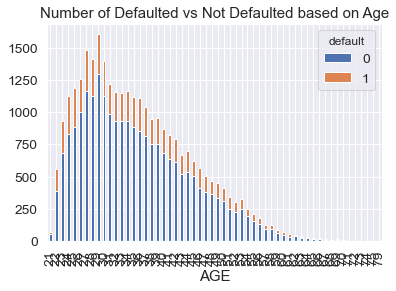

In [48]:
data_plot = data.groupby(['default', 'AGE']).size().reset_index().pivot(columns = 'default', index = 'AGE', values =0)
data_plot.plot(kind = 'bar', stacked=True)
plt.title("Number of Defaulted vs Not Defaulted based on Age")
plt.show()

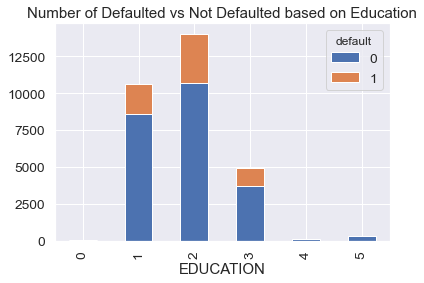

In [49]:
data_plot = data.groupby(['default', 'EDUCATION']).size().reset_index().pivot(columns = 'default', index = 'EDUCATION', values =0)
data_plot.plot(kind = 'bar', stacked=True)
plt.title("Number of Defaulted vs Not Defaulted based on Education")
plt.show()

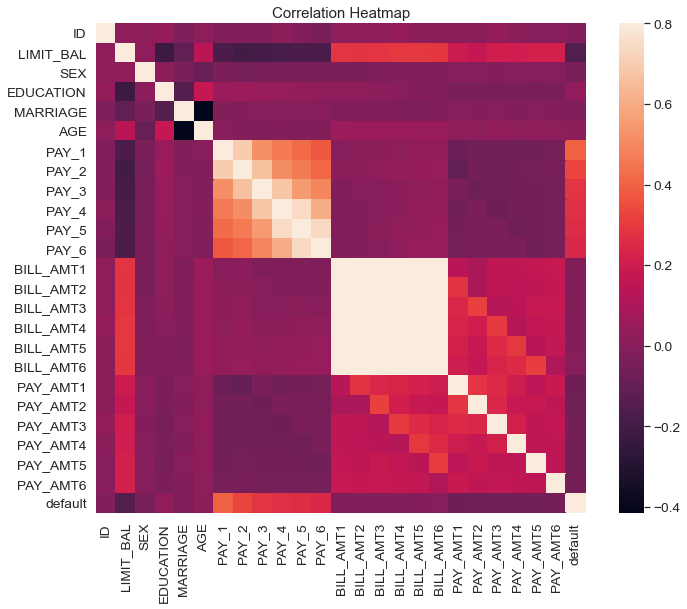

In [50]:
corrmat = data.corr()
f, ax = plt.subplots(figsize = (12,9))
plt.title('Correlation Heatmap')
sns.heatmap(corrmat, vmax = .8, square = True)

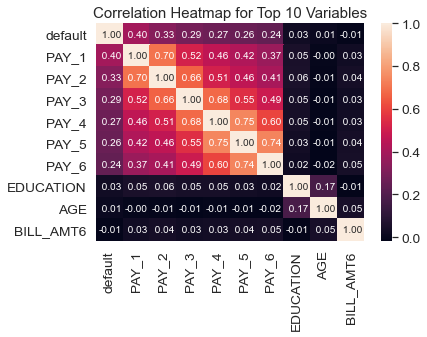

In [53]:
k = 10
cols = corrmat.nlargest(k, 'default')['default'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot = True, square = False, fmt = ' .2f',
                annot_kws = {'size': 10}, yticklabels = cols.values, xticklabels = cols.values)
plt.title('Correlation Heatmap for Top 10 Variables')
plt.show()

## Machine Learning Logistic Regression

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.inspection import permutation_importance

In [23]:
y = data['default'].values
X = data.drop(['default'], axis = 1).values

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)

In [25]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [59]:
logR = LogisticRegression(random_state =0)
logR.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [28]:
y_pred = logR.predict(X_test)
logR.score(X_test, y_test)

0.824

## Performance - Logistic Regression

In [39]:
cross_val_score(logR, X, y, cv = 10).mean()

0.7787999999999999

In [40]:
print(confusion_matrix(y_test, y_pred))

[[4510  193]
 [ 863  434]]


In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      4703
           1       0.69      0.33      0.45      1297

    accuracy                           0.82      6000
   macro avg       0.77      0.65      0.67      6000
weighted avg       0.81      0.82      0.80      6000



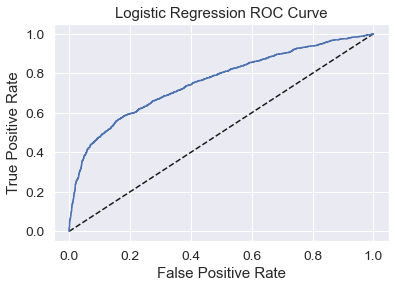

In [32]:
y_pred_prob = logR.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label = 'Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()